# 机器学习：实践作业四

**王海生 10235101559**

In [1]:
%pip install scikit-learn numpy matplotlib

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_recall_curve, roc_curve,
    f1_score, auc
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# 随机生成二维二分类数据
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=25
)

print("数据形状:", X.shape)
print("标签分布:", np.bincount(y))

数据形状: (200, 2)
标签分布: [100 100]


In [4]:
# 绘制 SVM 决策边界函数
def plot_svm_boundary(clf, X, y, title):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[0], linewidths=2)

    plt.title(title)
    plt.show()

In [5]:
C_values = [0.1, 1, 1e4]
models = {}

for C in C_values:
    clf = SVC(kernel="linear", C=C)
    clf.fit(X, y)
    models[C] = clf

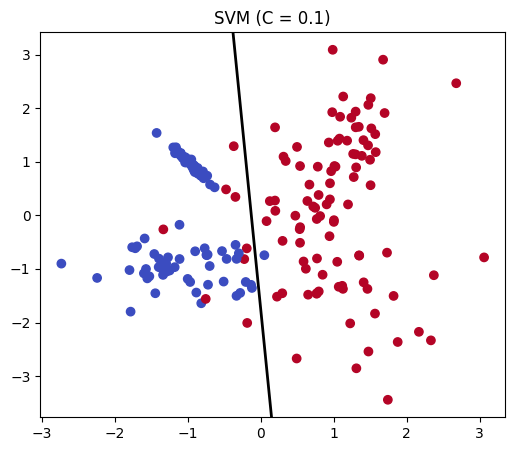

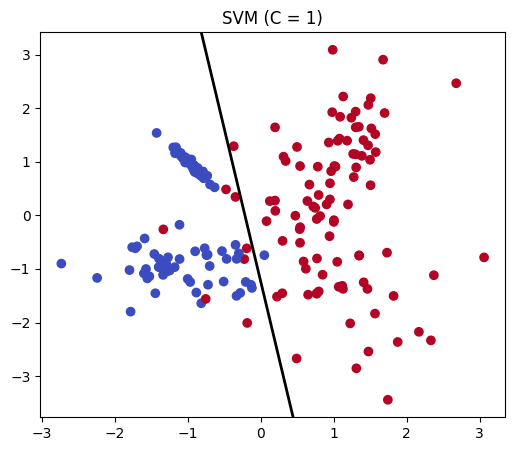

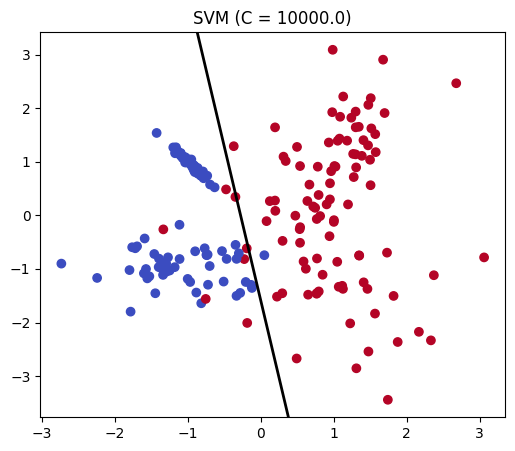

In [6]:
# 绘制不同 C 值的决策边界
for C in C_values:
    plot_svm_boundary(models[C], X, y, f"SVM (C = {C})")

In [7]:
# 加载 Iris 数据集
iris = datasets.load_iris()

X = iris.data
y = iris.target

print("数据形状:", X.shape)
print("标签:", np.unique(y))

数据形状: (150, 4)
标签: [0 1 2]


In [8]:
mask = y < 2
X = X[mask]
y = y[mask]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
clf = SVC(kernel="linear", probability=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("测试集精度:", accuracy_score(y_test, y_pred))

测试集精度: 1.0


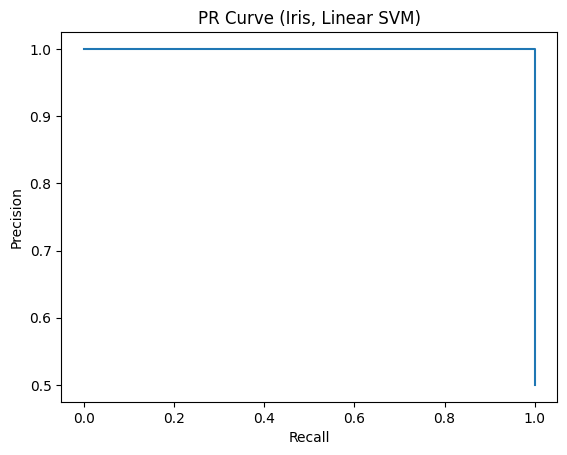

In [11]:
# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve (Iris, Linear SVM)")
plt.show()

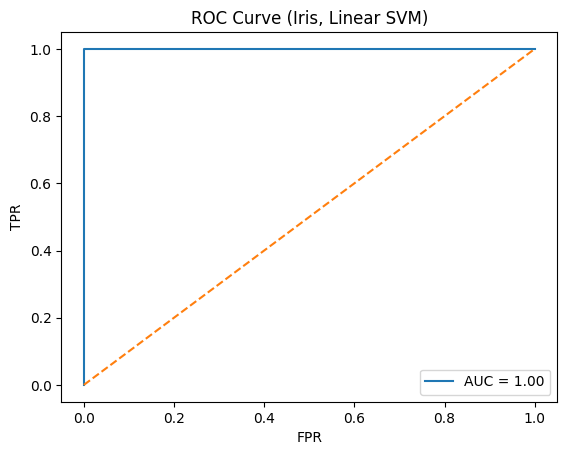

In [12]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve (Iris, Linear SVM)")
plt.legend()
plt.show()

In [13]:
print("F1值:", f1_score(y_test, y_pred))

F1值: 1.0


In [14]:
# 使用 make_moons 数据集模拟卫星数据的非线性结构
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
kernels = ["linear", "rbf", "poly"]
models = {}

for k in kernels:
    clf = SVC(kernel=k, probability=True)
    clf.fit(X_train, y_train)
    models[k] = clf

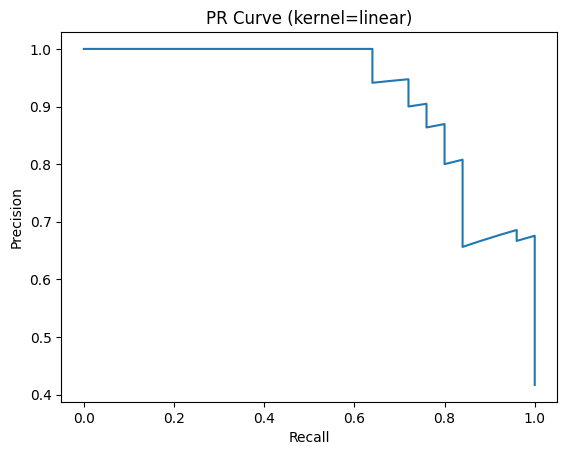

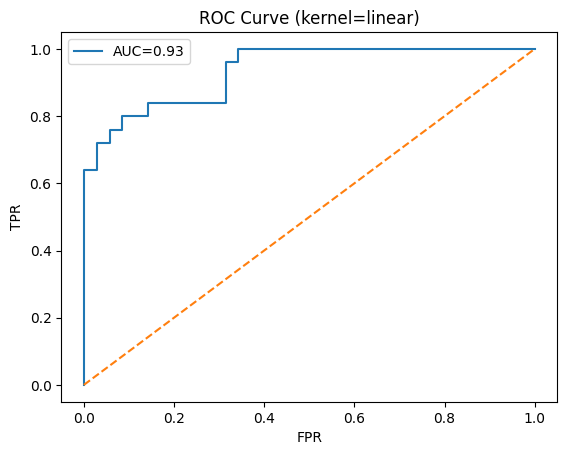

核函数 linear 的F1值: 0.8163265306122449


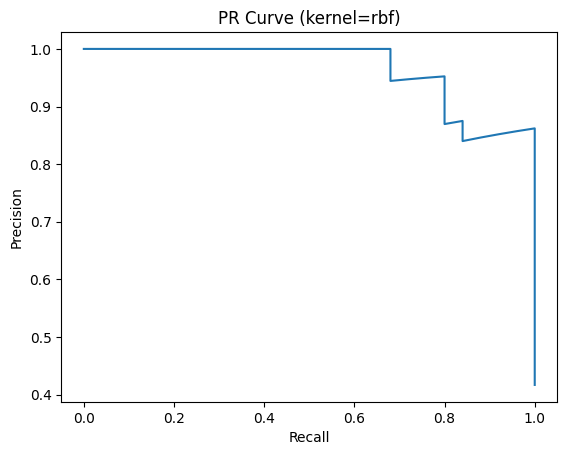

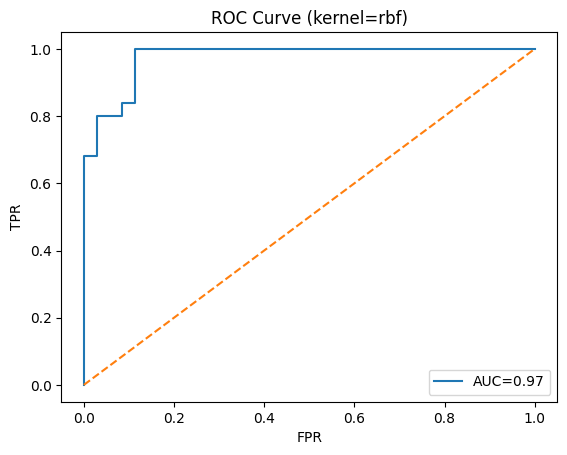

核函数 rbf 的F1值: 0.84


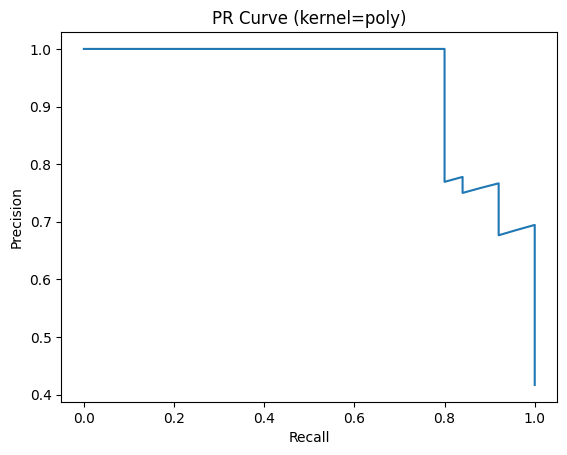

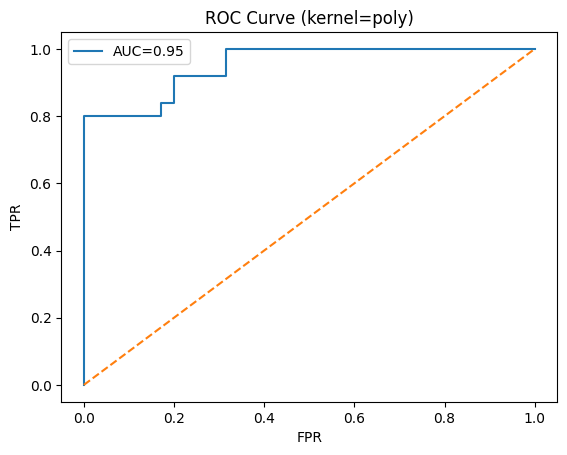

核函数 poly 的F1值: 0.8363636363636363


In [17]:
for k in kernels:
    clf = models[k]
    y_prob = clf.predict_proba(X_test)[:, 1]
    y_pred = clf.predict(X_test)

    # PR 曲线
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR Curve (kernel={k})")
    plt.show()

    # ROC 曲线
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
    plt.plot([0,1],[0,1],"--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC Curve (kernel={k})")
    plt.legend()
    plt.show()

    print(f"核函数 {k} 的F1值:", f1_score(y_test, y_pred))